# Sampling Distributions

__Agenda__

- Difference between population and sample
- How can we get a good sample?
- Point estimators from sample
- Sampling distribution, especially sampling distribution of the mean
- Central Limit Theorem - statement and use of it.
- Recap

## Population vs Sample

__population__ A population is the set of all elements of interest in a study. (Finite population and infinite population)

__sample__ A sample is a subset of the population.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population


<img src = "./img/sample_pop.png" width = 500/>

**Random sampling is not easy to do, let's look at an example:**

- [1936 Elections](https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case1.html)

- [US Census](https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case3.html)

- [Covid-19](https://www.nbcnewyork.com/news/local/new-york-virus-deaths-top-15k-cuomo-expected-to-detail-plan-to-fight-nursing-home-outbreaks/2386556/)





__Note:__

We can consider random sampling as an 'random experiment' and then when we calculate mean, variance, standard deviation, median etc. these are functions on the outcomes of this experiment. We have a name for such functions can you remember it?

## Point Estimates

In statistics, point estimation involves the use of sample data to calculate a single value (known as a point estimate since it identifies a point in some parameter space) which is to serve as a "best guess" or "best estimate" of an unknown population parameter (for example, the population mean). More formally, it is the application of a point estimator to the data to obtain a point estimate. 


<img src = './img/sample_stats.png' width = 450/>

### It's your turn :)

[Barcelona Accidents](https://github.com/DataScienceUB/introduction-datascience-python-book)

This notebook is inspired from chapter 4 of : [Introduction to Datascience](https://github.com/DataScienceUB/introduction-datascience-python-book)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Let us suppose that we are interested in describing the daily number of traffic acci- dents in the streets of Barcelona in 2013. If we have access to the population, the computation of this parameter is a simple operation: the total number of accidents divided by 365.

In [2]:
import chardet
# look at the first ten thousand bytes to guess the character encoding
with open("data/ACCIDENTS_GU_BCN_2013.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding= "ISO-8859-1")
data['Date'] =  data[u'Mes de any'].apply(lambda x: str(x))  + "-" + data[u'Dia de mes'].apply(lambda x: str(x)) + "-" + "2013"


data['Date'] = pd.to_datetime(data['Date'])
accidents = data.groupby(['Date']).size()
print(accidents.mean())

25.90958904109589


But now, for illustrative purposes, let us suppose that we only have access to a limited part of the data (the sample): the number of accidents during some days of 2013. Can we still give an approximation of the population mean?

In our example, because we have access to the population, we can empirically build `the sampling distribution` of the `sample mean` for a given number of observations.

In [4]:
df = accidents.to_frame() 

## Number of samples drawn from population
## How many times we conducted the experiment
N_test = 100

## Number of observations for each experiment

sample_size = 20

means = [0] * N_test
# sample generation
for i in range(N_test):
    sampled_df = df.sample(n = sample_size)
    means[i] = sampled_df.values.mean()

In [5]:
import seaborn as sns

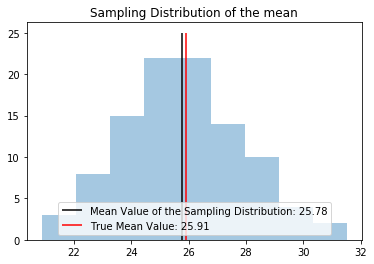

In [6]:
sns.distplot(means, kde = False, )

plt.vlines(x = np.mean(means), ymin = 0, ymax = 25, label = 'Mean Value of the Sampling Distribution: %.2f'%np.mean(means))

plt.vlines(x = accidents.mean(), ymin = 0, ymax = 25,color = 'r', label = 'True Mean Value: %.2f'%accidents.mean())

plt.title('Sampling Distribution of the mean')
plt.legend(loc = 8)
plt.show()

# Central Limit Theorem

The Central Limit Theorem states: 
>when the number of observations in a sample big enough , irrespective of the original distribution of the population, **the sampling mean distribution tends towards a normal distribution**.


__Note__ in CLT the shape of initial distribution is not important! With enough sample size we can always achieve a distribution very close to normal one.

<img src="img/clt_with_different.png" width="650">